**Import Libraries**

In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import time
import datetime
import sys
import sklearn
import scipy.stats as stats
import feature_engine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.sample(10)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
102984,0.0,0.874251,26.0,Female,Central,1200.0,Ownhouse,Non-officer,Graduate,1.0,0.012490,1200.0,2.0,0.0,0.0,0.0,0.0,Good
116651,0.0,0.016952,47.0,Male,West,4583.0,Ownhouse,Non-officer,Graduate,0.0,0.375000,4583.0,9.0,0.0,1.0,0.0,0.0,Good
135390,0.0,0.234894,57.0,Male,West,12083.0,Rented,Officer3,Professional,0.0,0.321168,12083.0,8.0,0.0,2.0,0.0,1,Good
130716,1.0,0.066750,58.0,Male,East,11250.0,Rented,Officer3,Professional,0.0,0.335170,11250.0,16.0,0.0,1.0,0.0,2.0,Bad
22793,0.0,0.124281,55.0,Male,North,13000.0,Ownhouse,Self_Emp,Graduate,0.0,0.320745,13000.0,4.0,0.0,2.0,0.0,2.0,Good
60410,0.0,1.026319,57.0,Male,Central,4333.0,Rented,Non-officer,Professional,3.0,0.082141,4333.0,9.0,0.0,0.0,1.0,2.0,Good
107392,0.0,1.000000,26.0,Male,South,4000.0,Ownhouse,Self_Emp,Matric,0.0,0.084729,4000.0,2.0,0.0,0.0,0.0,0.0,Good
59433,0.0,0.135982,68.0,Male,East,3329.0,Rented,Self_Emp,Professional,1.0,0.204805,3329.0,6.0,0.0,1.0,0.0,1.0,Good
117880,0.0,0.332344,44.0,Male,West,7800.0,Rented,Self_Emp,Graduate,0.0,0.411486,7800.0,11.0,0.0,1.0,0.0,0.0,Good
129464,0.0,0.407932,45.0,Female,East,11833.0,Rented,Self_Emp,Post-Grad,0.0,0.066165,11833.0,3.0,0.0,0.0,0.0,2.0,Good


**Preprocessing the data**
- `Find the data information Number of rows and columns `
- `Any Null values please check `
- `If there is any categorical column please find the labels and there count `
- `what is independent and what is dependent data `
- `Make Sure that we Split the data in the Initial Stage only `

In [6]:
df.info() # information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [7]:
# checking null values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(f'Number of Null values in Feature : {i} -> {df[i].isnull().sum()}')


Number of Null values in Feature : NPA Status -> 2
Number of Null values in Feature : RevolvingUtilizationOfUnsecuredLines -> 2
Number of Null values in Feature : age -> 2
Number of Null values in Feature : Gender -> 2
Number of Null values in Feature : Region -> 2
Number of Null values in Feature : MonthlyIncome -> 29733
Number of Null values in Feature : Rented_OwnHouse -> 2
Number of Null values in Feature : Occupation -> 2
Number of Null values in Feature : Education -> 2
Number of Null values in Feature : NumberOfTime30-59DaysPastDueNotWorse -> 2
Number of Null values in Feature : DebtRatio -> 2
Number of Null values in Feature : MonthlyIncome.1 -> 29733
Number of Null values in Feature : NumberOfOpenCreditLinesAndLoans -> 2
Number of Null values in Feature : NumberOfTimes90DaysLate -> 2
Number of Null values in Feature : NumberRealEstateLoansOrLines -> 2
Number of Null values in Feature : NumberOfTime60-89DaysPastDueNotWorse -> 2
Number of Null values in Feature : NumberOfDepende

In [8]:
df.tail(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [9]:
df = df.drop([150000,150001],axis=0)

In [10]:
df.tail(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good


In [11]:
# checking null values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    print(f'Number of Null values in Feature : {i} -> {df[i].isnull().sum()}')


Number of Null values in Feature : MonthlyIncome -> 29731
Number of Null values in Feature : MonthlyIncome.1 -> 29731
Number of Null values in Feature : NumberOfDependents -> 3924


In [12]:
# finding the lables and there count in each categorical column

for j in df.columns:
  if df[j].dtype == 'object':
    print(f'Number of Lables in {j} -> {df[j].unique()} -> {len(df[j].unique())} -> count : {df[j].value_counts()}')

Number of Lables in Gender -> ['Male' 'Female'] -> 2 -> count : Gender
Male      92304
Female    57696
Name: count, dtype: int64
Number of Lables in Region -> ['South' 'North' 'West' 'East' 'Central'] -> 5 -> count : Region
Central    43956
North      34099
West       27899
South      23495
East       20551
Name: count, dtype: int64
Number of Lables in Rented_OwnHouse -> ['Ownhouse' 'Rented'] -> 2 -> count : Rented_OwnHouse
Ownhouse    85953
Rented      64047
Name: count, dtype: int64
Number of Lables in Occupation -> ['Self_Emp' 'Officer1' 'Officer3' 'Non-officer' 'Officer2'] -> 5 -> count : Occupation
Self_Emp       64116
Non-officer    41113
Officer3       16274
Officer1       15164
Officer2       13333
Name: count, dtype: int64
Number of Lables in Education -> ['Matric' 'Graduate' 'PhD' 'Professional' 'Post-Grad'] -> 5 -> count : Education
Professional    50920
Graduate        39755
Post-Grad       37214
Matric          15810
PhD              6301
Name: count, dtype: int64
Number o

In [13]:
# Independent and dependent
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [15]:
print(f'Number of Rows for training Purpose : {len(X_train)}')
print(f'Number of Rows for test Purpose : {len(X_test)}')

Number of Rows for training Purpose : 135000
Number of Rows for test Purpose : 15000


**Handling Missing Values for Numerical Features**

In [16]:
c = []
d = []
for i in X_train.columns:
  if X_train[i].isnull().sum() > 0:
    c.append(X_train[i].dtype)
    d.append(i)
print(c)
print(d)

[dtype('float64'), dtype('float64'), dtype('O')]
['MonthlyIncome', 'MonthlyIncome.1', 'NumberOfDependents']


In [17]:
X_train.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
135986,0.0,0.582945,39.0,Male,West,NaN,Rented,Self_Emp,Professional,0.0,127.000000,NaN,3.0,0.0,0.0,0.0,0
48361,0.0,0.509778,65.0,Female,East,3060.0,Rented,Officer1,Post-Grad,0.0,0.284874,3060.0,5.0,0.0,0.0,0.0,0.0
146561,0.0,0.143965,55.0,Male,South,15833.0,Ownhouse,Self_Emp,Professional,1.0,0.484148,15833.0,16.0,0.0,3.0,0.0,1
57742,0.0,0.715410,43.0,Male,East,5882.0,Ownhouse,Officer3,Professional,0.0,0.135305,5882.0,11.0,0.0,0.0,0.0,1.0
43651,0.0,0.000000,49.0,Male,North,NaN,Ownhouse,Self_Emp,Post-Grad,0.0,871.000000,NaN,21.0,0.0,2.0,0.0,4.0


In [18]:
# checking whether MonthlyIncome and MonthlyIncome.1 same or not
f = []
for i in X_train.index:
  if X_train['MonthlyIncome'][i] == X_train['MonthlyIncome.1'][i]:
    # print('value')
    pass
  elif np.isnan(X_train['MonthlyIncome.1'][i]) == np.isnan(X_train['MonthlyIncome'][i]):
    # print('Null')
    pass
  else:
    f.append(i)

print(f)

[]


In [19]:
X_train = X_train.drop(['MonthlyIncome.1'],axis=1)

In [20]:
c = []
d = []
for i in X_train.columns:
  if X_train[i].isnull().sum() > 0:
    c.append(X_train[i].dtype)
    d.append(i)
print(c)
print(d)

[dtype('float64'), dtype('O')]
['MonthlyIncome', 'NumberOfDependents']


- `Mean Median Mode **`
- `End of Distribution - `
- `Arbitary Value -`
- `Constant value technique `
- `Random Sample Technique *********`

In [21]:
# mean
mean_monthly_income = X_train['MonthlyIncome'].mean()
mean_monthly_income

6673.833006964586

In [22]:
# media

median_monthly_income = X_train['MonthlyIncome'].median()
median_monthly_income

5400.0

In [23]:
# Mode

Mode_monthly_income = X_train['MonthlyIncome'].mode()[0]
Mode_monthly_income

5000.0

In [24]:
def fun(col,x,y,z):
  X_train[col+'_mean'] = X_train[col].fillna(x)
  X_train[col+'_median'] = X_train[col].fillna(y)
  X_train[col+'_mode'] = X_train[col].fillna(z)



In [25]:
fun('MonthlyIncome',mean_monthly_income,median_monthly_income,Mode_monthly_income)

In [26]:
X_train.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26738
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3548
MonthlyIncome_mean                          0
MonthlyIncome_median                        0
MonthlyIncome_mode                          0
dtype: int64

In [27]:
print(f'The std of orignial Monthly Income : {X_train["MonthlyIncome"].std()}')
print(f'The std of Mean Monthly Income : {X_train["MonthlyIncome_mean"].std()}')
print(f'The std of Median Monthly Income : {X_train["MonthlyIncome_median"].std()}')
print(f'The std of Mode Monthly Income : {X_train["MonthlyIncome_mode"].std()}')

The std of orignial Monthly Income : 14754.418707270997
The std of Mean Monthly Income : 13212.738669755357
The std of Median Monthly Income : 13222.488175493865
The std of Mode Monthly Income : 13229.567950804216


In [28]:
X_train.MonthlyIncome

135986        NaN
48361      3060.0
146561    15833.0
57742      5882.0
43651         NaN
           ...   
119879    10000.0
103694        NaN
131932     2800.0
146867     1500.0
121958    10000.0
Name: MonthlyIncome, Length: 135000, dtype: float64

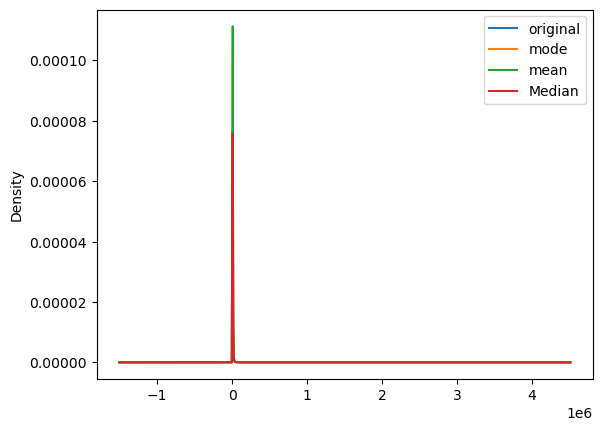

In [29]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)


X_train['MonthlyIncome'].plot(kind='kde',ax=ax,label='original')
X_train['MonthlyIncome_mode'].plot(kind='kde',ax=ax,label = 'mode')
X_train['MonthlyIncome_mean'].plot(kind='kde',ax=ax,label = 'mean')
X_train['MonthlyIncome_median'].plot(kind='kde',ax=ax,label = 'Median')

plt.legend(loc = 0)

plt.show()

In [30]:
X_train = X_train.drop(['MonthlyIncome','MonthlyIncome_mean','MonthlyIncome_median'],axis=1)

In [31]:
X_train.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3548
MonthlyIncome_mode                         0
dtype: int64

checking with X_test

In [32]:
X_test.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2993
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome.1                         2993
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       376
dtype: int64

In [33]:
X_test['MonthlyIncome'] = X_test['MonthlyIncome'].fillna(Mode_monthly_income)
X_test.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                              0
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome.1                         2993
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       376
dtype: int64

In [34]:
X_test = X_test.drop(['MonthlyIncome.1'],axis=1)

In [35]:
# again coming back to the training data

X_train['NumberOfDependents']

135986      0
48361     0.0
146561      1
57742     1.0
43651     4.0
         ... 
119879    3.0
103694    1.0
131932      0
146867      0
121958    0.0
Name: NumberOfDependents, Length: 135000, dtype: object

In [36]:
# converting string data to int

X_train['NumberOfDependents'] = pd.to_numeric(X_train['NumberOfDependents'])
X_train.NumberOfDependents.dtype

dtype('float64')

In [37]:
number_mean,number_median,number_mode = X_train['NumberOfDependents'].mean(),X_train['NumberOfDependents'].median(),X_train['NumberOfDependents'].mode()[0]

fun('NumberOfDependents',number_mean,number_median,number_mode)

print(f'The std of orignial NumberOfDependents  : {X_train["NumberOfDependents"].std()}')
print(f'The std of Mean NumberOfDependents  : {X_train["NumberOfDependents_mean"].std()}')
print(f'The std of Median NumberOfDependents  : {X_train["NumberOfDependents_median"].std()}')
print(f'The std of Mode NumberOfDependents  : {X_train["NumberOfDependents_mode"].std()}')


The std of orignial NumberOfDependents  : 1.1146446970540291
The std of Mean NumberOfDependents  : 1.0998998064151944
The std of Median NumberOfDependents  : 1.1065889806832303
The std of Mode NumberOfDependents  : 1.1065889806832303


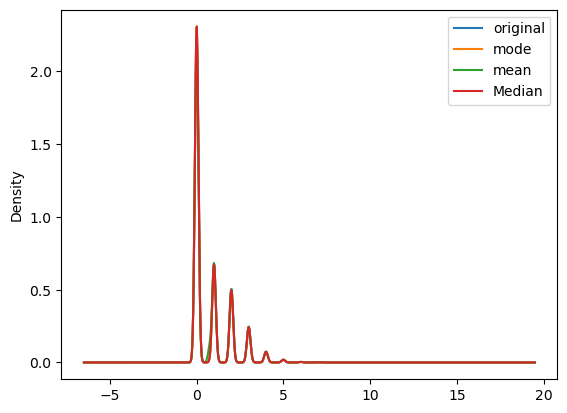

In [38]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)


X_train['NumberOfDependents'].plot(kind='kde',ax=ax,label='original')
X_train['NumberOfDependents_mode'].plot(kind='kde',ax=ax,label = 'mode')
X_train['NumberOfDependents_mean'].plot(kind='kde',ax=ax,label = 'mean')
X_train['NumberOfDependents_median'].plot(kind='kde',ax=ax,label = 'Median')

plt.legend(loc = 0)

plt.show()

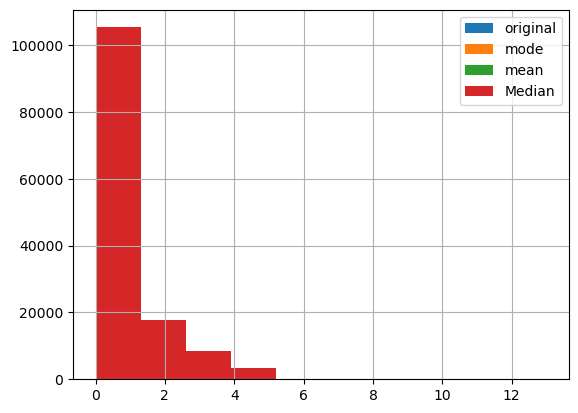

In [39]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)


X_train['NumberOfDependents'].hist(bins=10,ax=ax,label='original')
X_train['NumberOfDependents_mode'].hist(bins=10,ax=ax,label = 'mode')
X_train['NumberOfDependents_mean'].hist(bins=10,ax=ax,label = 'mean')
X_train['NumberOfDependents_median'].hist(bins=10,ax=ax,label = 'Median')

plt.legend(loc = 0)

plt.show()

In [40]:
X_train = X_train.drop(['NumberOfDependents','NumberOfDependents_mean','NumberOfDependents_mode'],axis=1)

In [41]:
# doing same thing for test data

X_test['NumberOfDependents'] = pd.to_numeric(X_test['NumberOfDependents'])
X_test['NumberOfDependents'] = X_test['NumberOfDependents'].fillna(number_median)

In [42]:
X_test.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

`so we have completed -> Null values cleaning in Numerical columns and there are no Null values in categorical columns `

In [43]:
X_train.sample(5)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_mode,NumberOfDependents_median
86202,0.0,0.240694,35.0,Female,Central,Ownhouse,Non-officer,Graduate,0.0,0.119600,7.0,0.0,0.0,0.0,2800.0,0.0
62815,0.0,0.000000,51.0,Male,Central,Rented,Self_Emp,Professional,0.0,0.290855,6.0,0.0,2.0,0.0,3695.0,5.0
23862,0.0,0.494269,55.0,Male,North,Ownhouse,Non-officer,Graduate,0.0,0.371037,4.0,0.0,0.0,0.0,2333.0,3.0
146417,0.0,0.447668,55.0,Male,South,Ownhouse,Self_Emp,Professional,0.0,0.212413,13.0,0.0,1.0,0.0,14033.0,0.0
31460,0.0,1.000000,41.0,Female,North,Ownhouse,Non-officer,Graduate,0.0,0.361925,4.0,0.0,1.0,0.0,3718.0,1.0


In [44]:
# I am selecting Only Numerical Columns and going to check Normal Distribution | Variable Transformation | Feature Scaling | Outliers  Handlling

numerical_X_train = X_train.select_dtypes(exclude = 'object')
numerical_X_train

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome_mode,NumberOfDependents_median
135986,0.0,0.582945,39.0,0.0,127.000000,3.0,0.0,0.0,0.0,5000.0,0.0
48361,0.0,0.509778,65.0,0.0,0.284874,5.0,0.0,0.0,0.0,3060.0,0.0
146561,0.0,0.143965,55.0,1.0,0.484148,16.0,0.0,3.0,0.0,15833.0,1.0
57742,0.0,0.715410,43.0,0.0,0.135305,11.0,0.0,0.0,0.0,5882.0,1.0
43651,0.0,0.000000,49.0,0.0,871.000000,21.0,0.0,2.0,0.0,5000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.003175,44.0,0.0,0.367863,7.0,1.0,2.0,0.0,10000.0,3.0
103694,0.0,0.087697,67.0,1.0,1781.000000,10.0,0.0,1.0,0.0,5000.0,1.0
131932,0.0,0.068788,49.0,0.0,0.673331,8.0,0.0,2.0,0.0,2800.0,0.0
146867,0.0,0.219630,36.0,0.0,0.025316,2.0,0.0,0.0,0.0,1500.0,0.0


`checking Normal Distribution for numerical_X_train `


In [45]:
sns.__version__

'0.12.2'

In [46]:
import scipy.stats as stats

def n_d(numerical_X_train,var):
    plt.figure(figsize = (8,3))
    plt.subplot(1,3,1)
    plt.title(str(var))
    numerical_X_train[var].plot(kind='kde',color = 'g')
    plt.subplot(1,3,2)
    plt.title(str(var))
    stats.probplot(numerical_X_train[var], dist = 'norm',plot=plt)
    plt.subplot(1,3,3)
    sns.boxplot(x = numerical_X_train[var])
    plt.show()


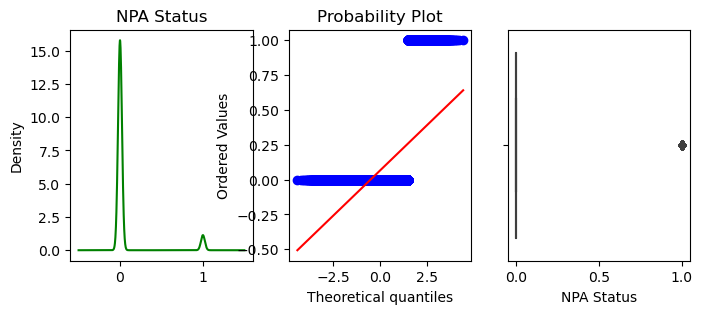

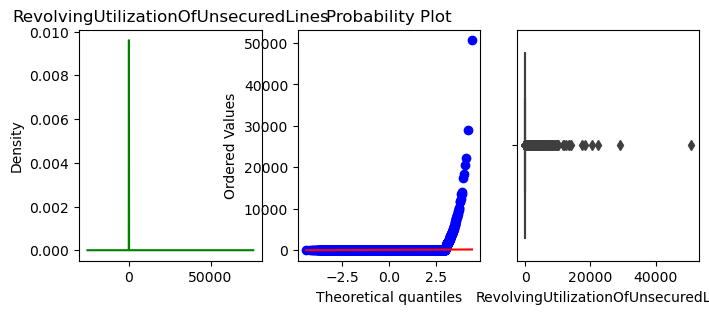

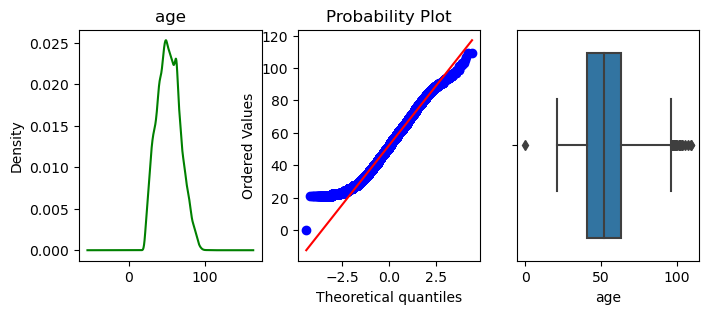

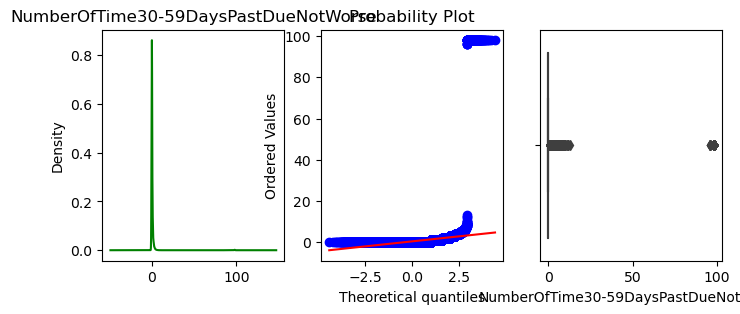

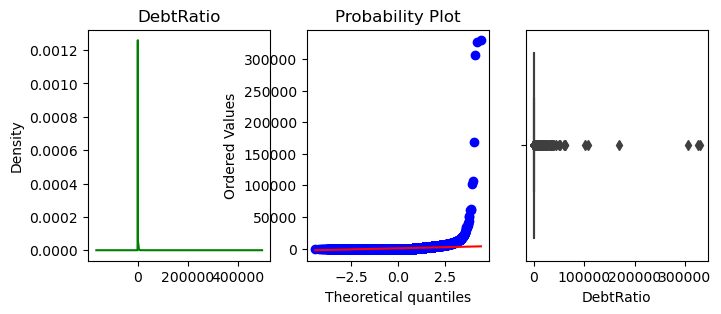

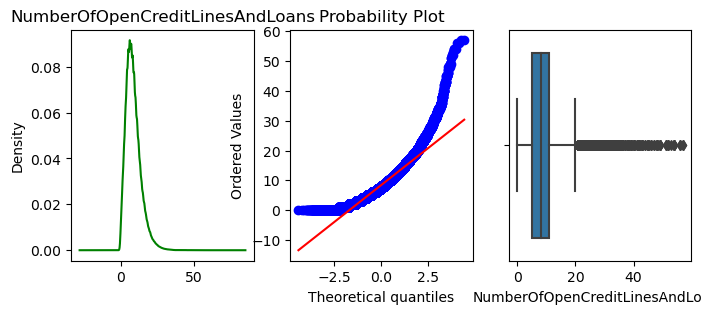

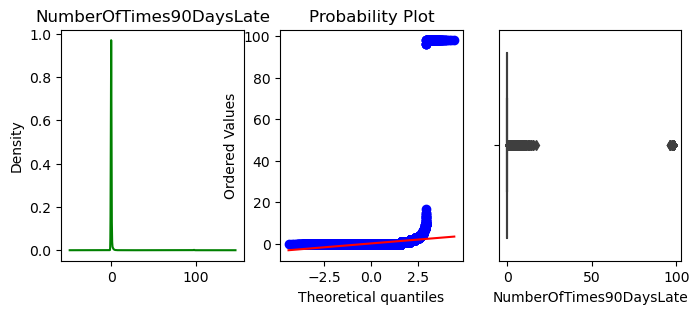

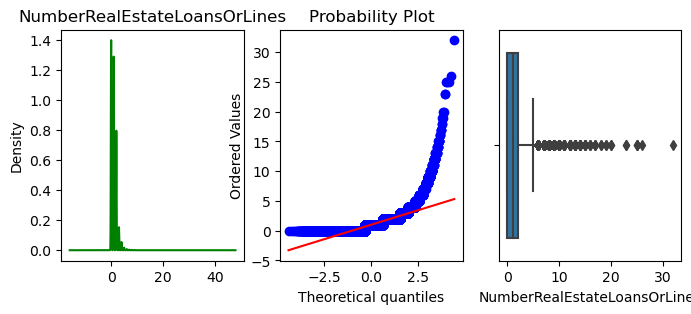

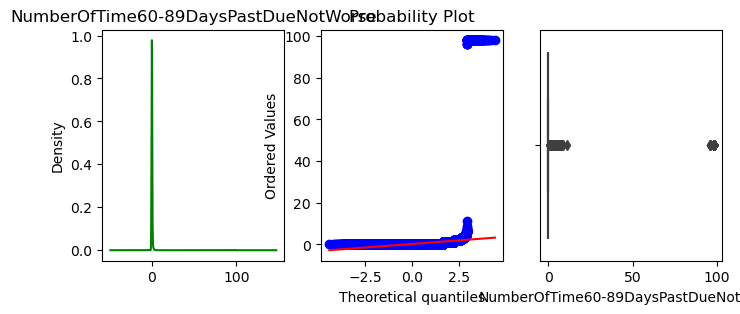

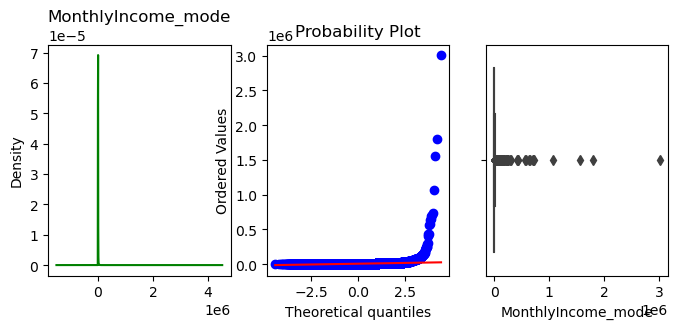

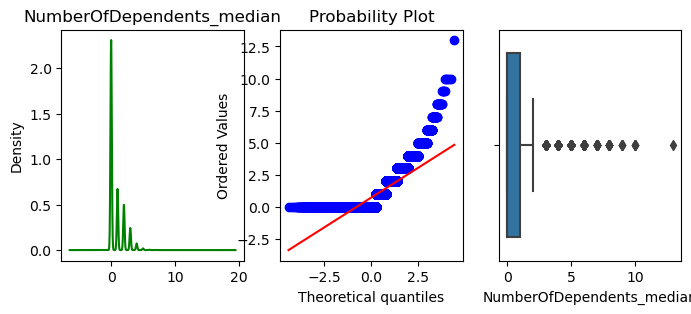

In [47]:
for i in numerical_X_train.columns:
    n_d(numerical_X_train,i)


**Variable Tranformation**

- `Log Transorformation `
- `1/n Transormation `
`- square root Transformation `
- `Exponentional Transformation `
- `Box Cox Transormation `
- `Yeojohnson Transformation `

In [48]:
# so we are going to apply boxcox and convert the data into best way

def box_cox(numerical_X_train,original,log_original):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.title('original_X_train_numerical_feature')
  numerical_X_train[original].plot(kind = 'kde' , color='r',label ='orignial_Xtrain_feature')
  plt.subplot(1,2,2)
  plt.title('Log_feature_Transformation')
  numerical_X_train[log_original].plot(kind = 'kde',color = 'g' , label = 'log_feature')
  plt.show()

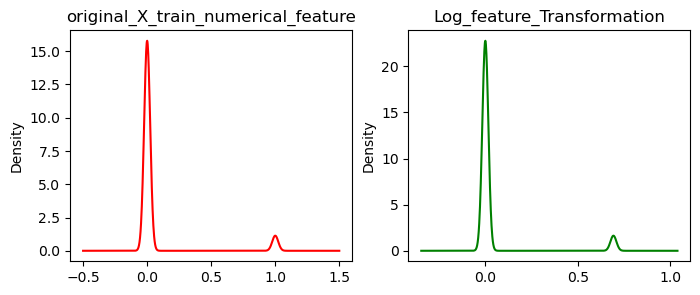

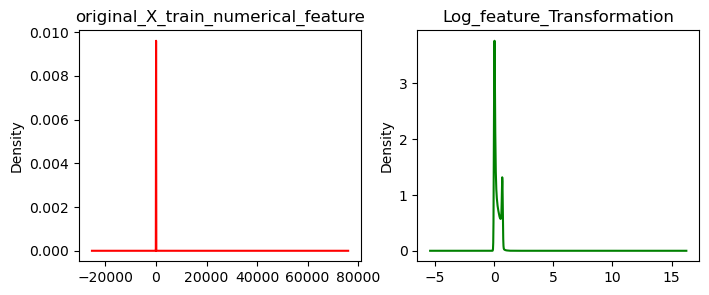

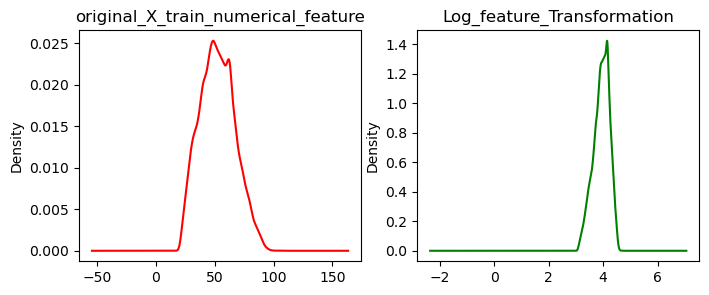

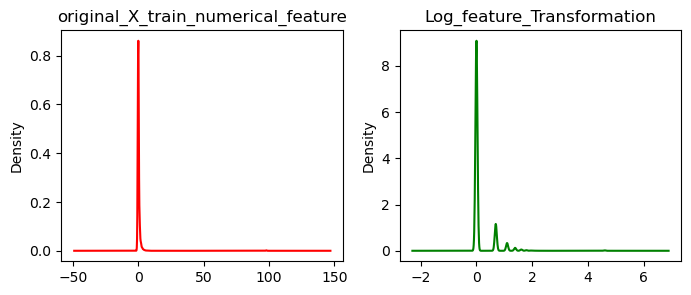

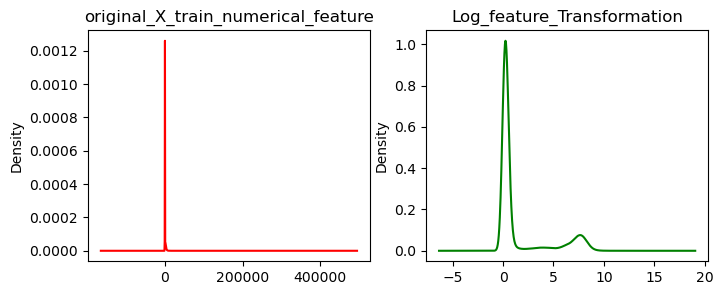

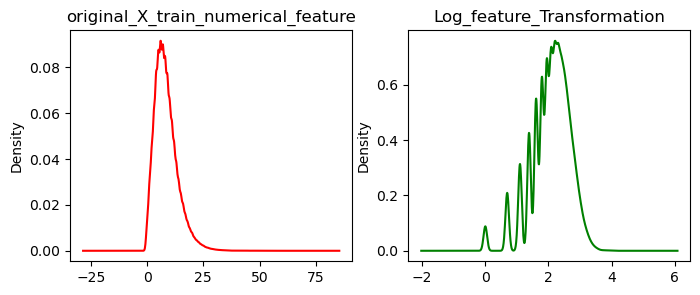

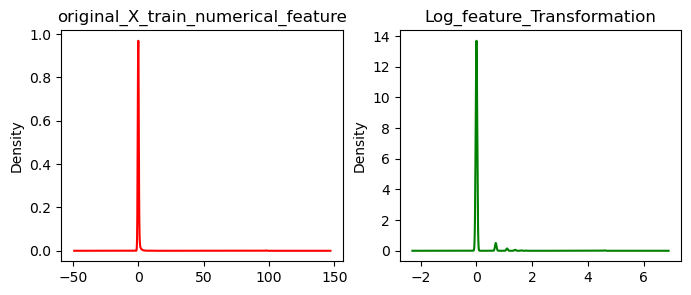

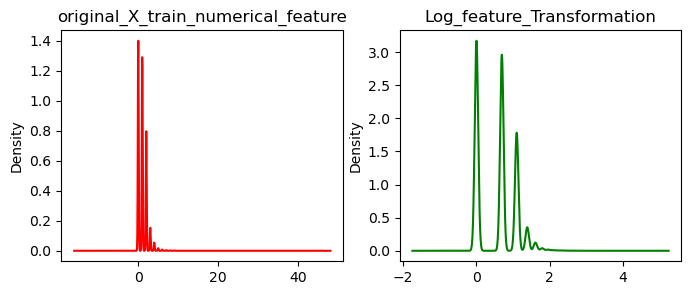

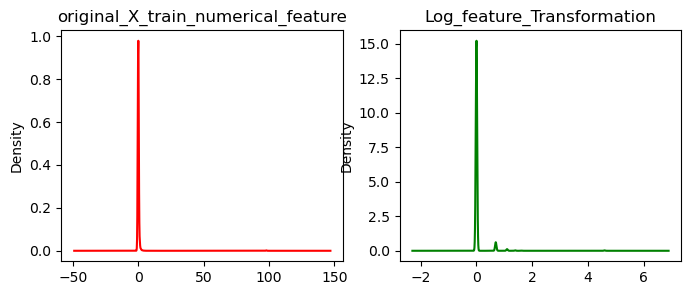

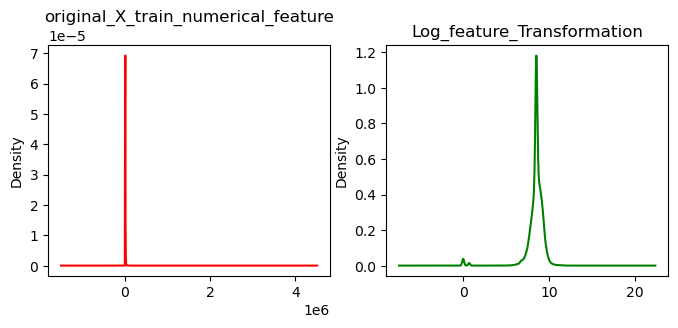

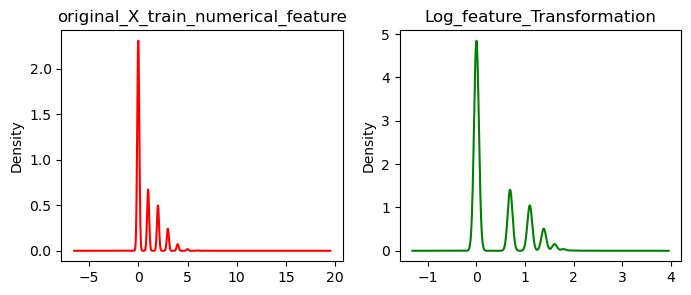

In [49]:
for i in numerical_X_train.columns:
  numerical_X_train[i+'_log'] = np.log(numerical_X_train[i] + 1)
  box_cox(numerical_X_train,i,i+'_log')


In [50]:
numerical_X_train.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median', 'NPA Status_log',
       'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'MonthlyIncome_mode_log',
       'NumberOfDependents_median_log'],
      dtype='object')

In [51]:
# checking outliers for originalX_train_num features and converted [log] outliers
import warnings
warnings.filterwarnings('ignore')

def boxplot_(numerical_X_train,original,log_original):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.title('original_X_train_numerical_feature')
  sns.boxplot(x = numerical_X_train[original])
  plt.subplot(1,2,2)
  plt.title('Log_feature_Transformation')
  sns.boxplot(x = numerical_X_train[log_original])
  plt.show()

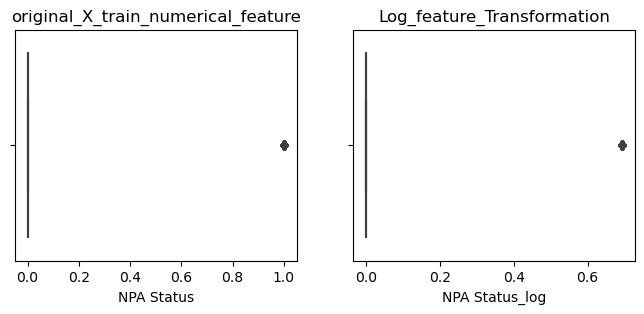

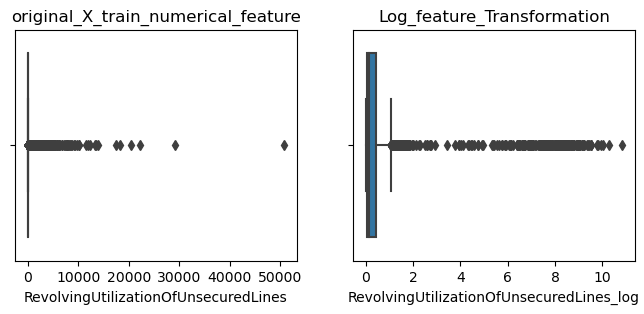

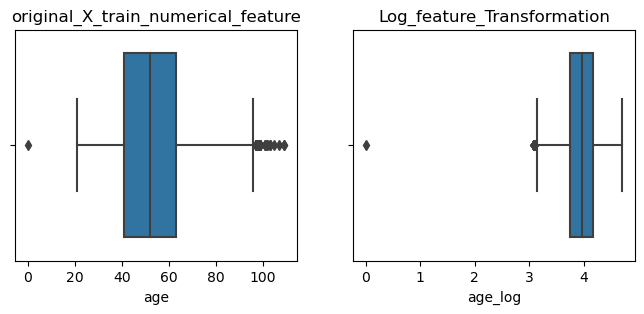

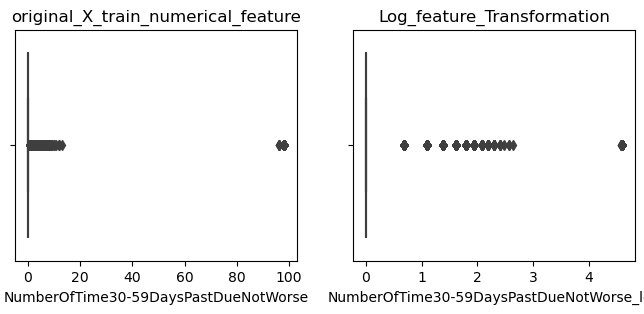

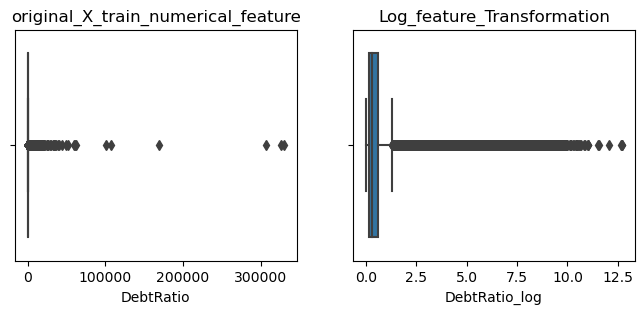

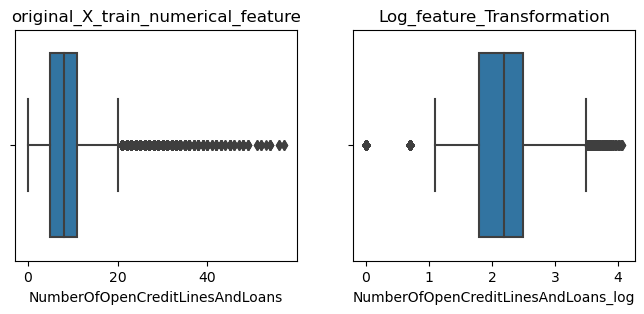

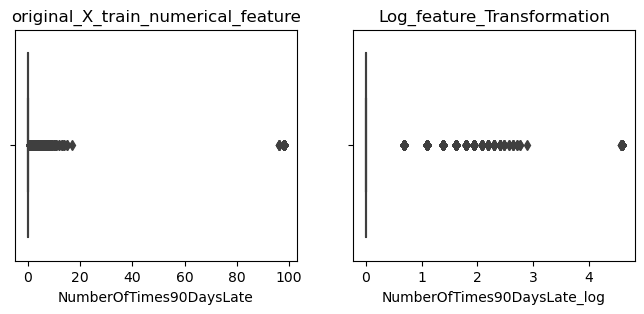

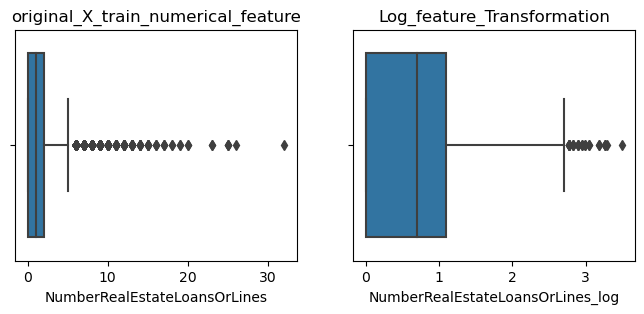

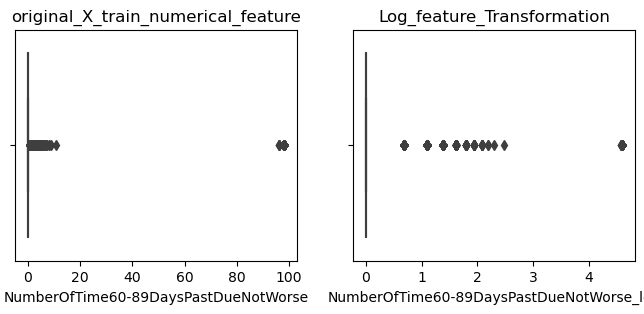

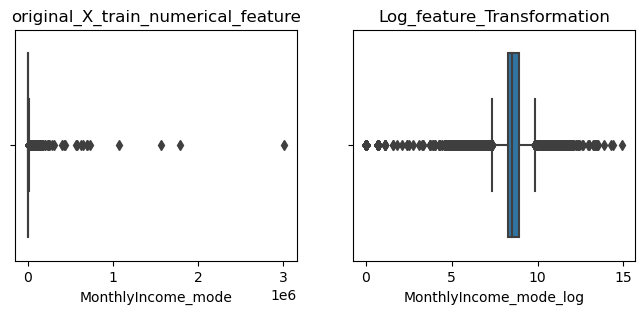

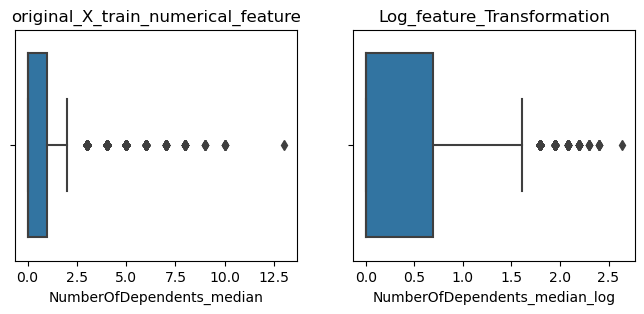

In [52]:
c = []
d = []
for i in numerical_X_train.columns:
  if i.endswith('_log'):
    c.append(i)
  else:
    d.append(i)

for j in range(len(c)):
  boxplot_(numerical_X_train,d[j],c[j])

In [53]:
numerical_X_train = numerical_X_train.drop(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'MonthlyIncome_mode', 'NumberOfDependents_median'],axis=1)

In [54]:
numerical_X_train.sample(5)

,NPA Status_log,RevolvingUtilizationOfUnsecuredLines_log,age_log,NumberOfTime30-59DaysPastDueNotWorse_log,DebtRatio_log,NumberOfOpenCreditLinesAndLoans_log,NumberOfTimes90DaysLate_log,NumberRealEstateLoansOrLines_log,NumberOfTime60-89DaysPastDueNotWorse_log,MonthlyIncome_mode_log,NumberOfDependents_median_log
141100,0.0,0.006225,3.688879,0.0,0.064481,2.772589,0.000000,0.000000,0.000000,7.692570,0.693147
10243,0.0,0.686125,4.007333,0.0,6.234411,1.098612,0.693147,0.693147,0.000000,8.517393,0.000000
88217,0.0,0.000000,4.234107,0.0,0.000000,1.386294,0.000000,0.000000,0.693147,8.517393,0.000000
105115,0.0,0.128574,3.663562,0.0,0.011228,1.945910,0.000000,0.000000,0.000000,8.354910,0.000000
22933,0.0,0.050626,4.418841,0.0,0.311161,1.609438,0.000000,0.693147,0.000000,8.588024,0.000000


In [55]:
numerical_X_train = numerical_X_train.drop(['NPA Status_log','NumberOfTime30-59DaysPastDueNotWorse_log'],axis=1)

In [56]:
numerical_X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'MonthlyIncome_mode_log',
       'NumberOfDependents_median_log'],
      dtype='object')

to handle outliers I am using 5th and 95th quantile

In [57]:
# 5th and 95th


def fith(numerical_X_train,var):
  upper = numerical_X_train[var].quantile(0.95)
  lower = numerical_X_train[var].quantile(0.05)
  return upper , lower

for i in numerical_X_train.columns:
  upper,lower = fith(numerical_X_train,i)
  numerical_X_train[i+'_5th'] = np.where(numerical_X_train[i] > upper , upper ,
                                  np.where(numerical_X_train[i] < lower , lower , numerical_X_train[i]))


In [58]:
# checking outliers for originalX_train_num features and converted [log] outliers
import warnings
warnings.filterwarnings('ignore')

def boxplot_(numerical_X_train,original,log_original):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.title('original_X_train_numerical_feature')
  sns.boxplot(x = numerical_X_train[original])
  plt.subplot(1,2,2)
  plt.title('5th_feature_Transformation')
  sns.boxplot(x = numerical_X_train[log_original])
  plt.show()

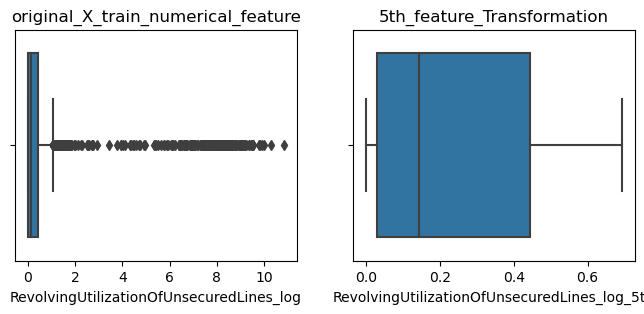

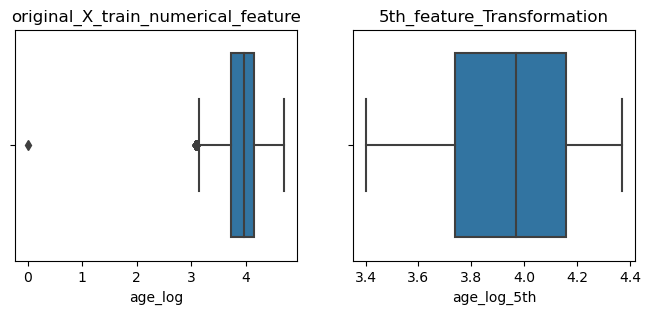

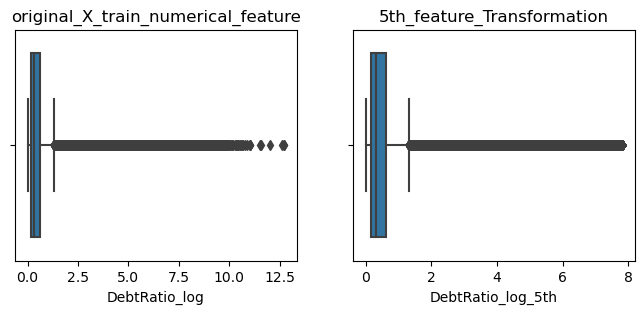

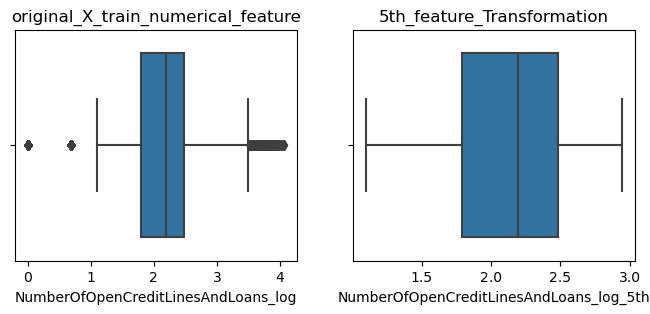

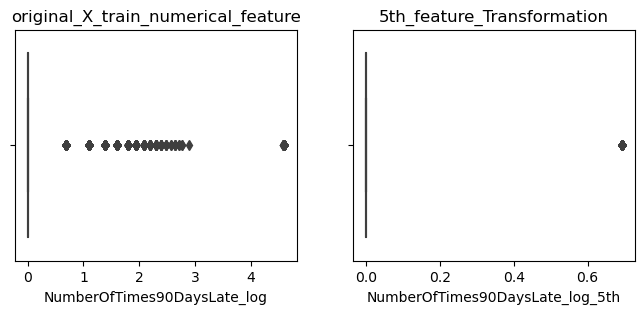

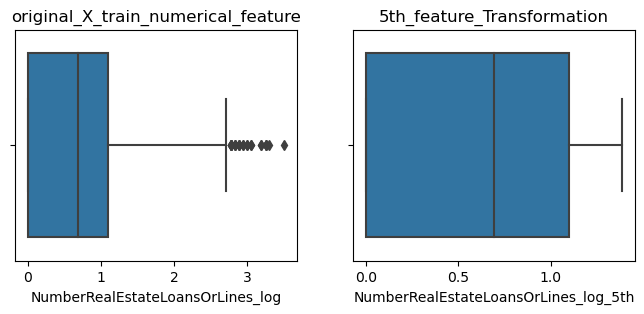

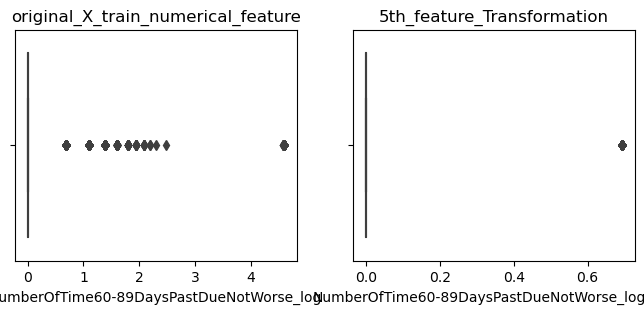

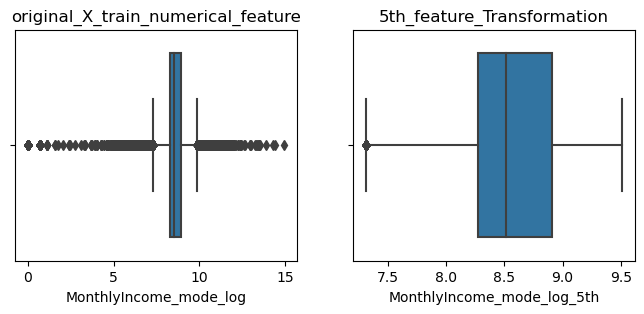

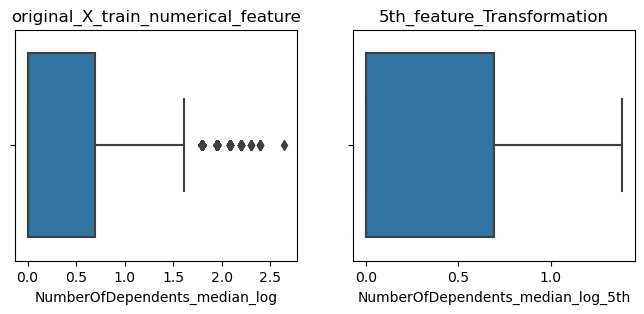

In [59]:
c = []
d = []
for i in numerical_X_train.columns:
  if i.endswith('_log'):
    c.append(i)
  else:
    d.append(i)

for j in range(len(c)):
  boxplot_(numerical_X_train,c[j],d[j])

In [60]:
numerical_X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'MonthlyIncome_mode_log',
       'NumberOfDependents_median_log',
       'RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'DebtRatio_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'MonthlyIncome_mode_log_5th', 'NumberOfDependents_median_log_5th'],
      dtype='object')

In [61]:
numerical_X_train = numerical_X_train.drop(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'MonthlyIncome_mode_log',
       'NumberOfDependents_median_log'],axis=1)

numerical_X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'DebtRatio_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'MonthlyIncome_mode_log_5th', 'NumberOfDependents_median_log_5th'],
      dtype='object')

In [62]:
a1 = ['DebtRatio_log_5th','NumberOfTimes90DaysLate_log_5th','NumberOfTime60-89DaysPastDueNotWorse_log_5th']

for j in a1:
  print(numerical_X_train[j].unique())

[4.85203026 0.25066083 0.39484089 ... 0.01409785 0.31324982 0.1000168 ]
[0.         0.69314718]
[0.         0.69314718]


In [63]:
numerical_X_train = numerical_X_train.drop(['NumberOfTimes90DaysLate_log_5th','NumberOfTime60-89DaysPastDueNotWorse_log_5th'],axis=1)
numerical_X_train.sample(5)


,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,MonthlyIncome_mode_log_5th,NumberOfDependents_median_log_5th
118137,0.380325,4.127134,0.117360,2.197225,0.000000,9.005896,0.000000
77124,0.000000,4.127134,0.348160,2.639057,0.693147,8.187855,0.693147
129543,0.088835,3.912023,0.142679,1.386294,0.000000,8.430327,0.000000
110946,0.095125,3.828641,0.153231,2.079442,1.098612,9.123365,0.000000
73244,0.198675,4.276666,0.168961,2.564949,0.693147,7.972811,0.000000


In [64]:
# same things which we applied on the numerical_X_train need to implement on the X_test
X_test.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [65]:
X_test = X_test.drop(['NPA Status','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender', 'Region',
       'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'DebtRatio', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

In [66]:
numerical_X_test = X_test.select_dtypes(exclude = 'object')
numerical_X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome',
       'DebtRatio', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')

In [67]:
# so we are going to apply boxcox and convert the data into best way

def box_cox(numerical_X_test,original,log_original):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.title('original_X_test_numerical_feature')
  numerical_X_test[original].plot(kind = 'kde' , color='r',label ='orignial_Xtest_feature')
  plt.subplot(1,2,2)
  plt.title('Log_feature_Transformation')
  numerical_X_test[log_original].plot(kind = 'kde',color = 'g' , label = 'log_feature')
  plt.show()

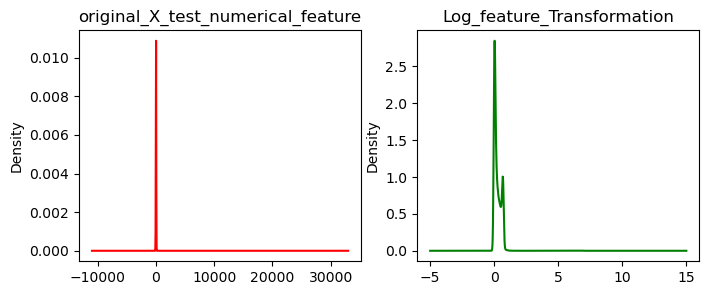

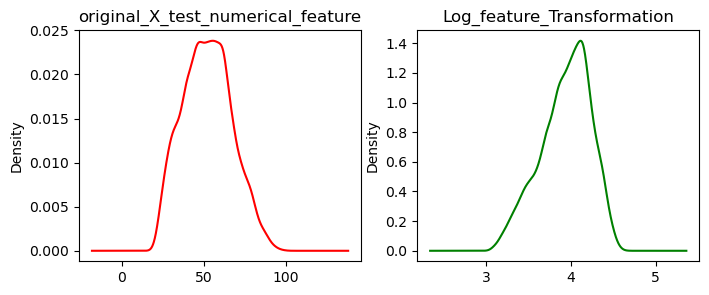

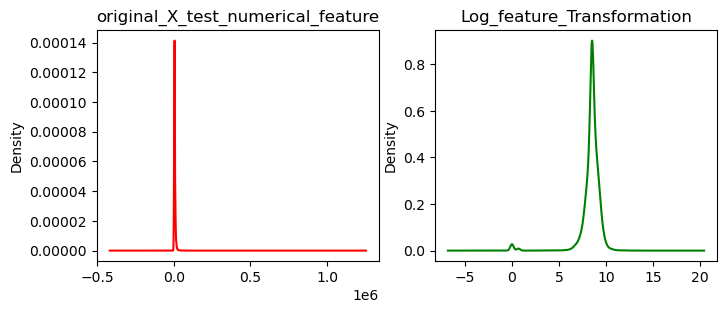

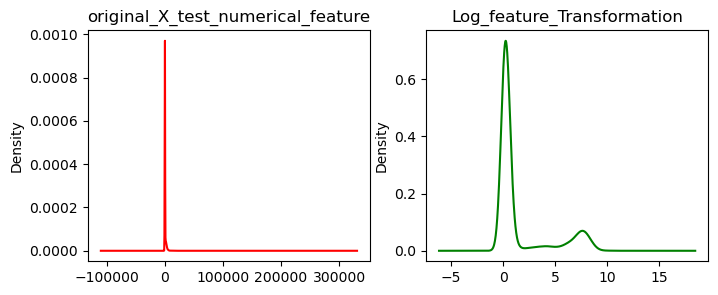

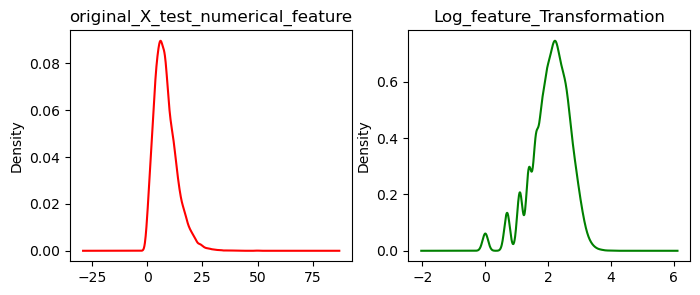

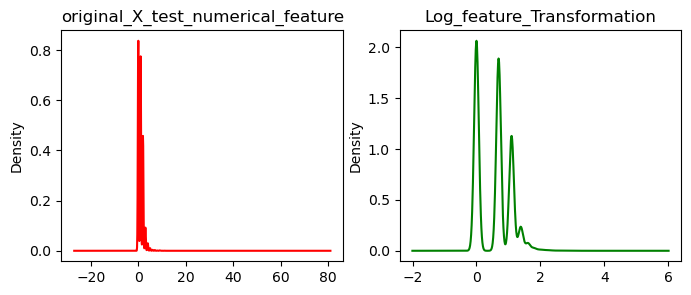

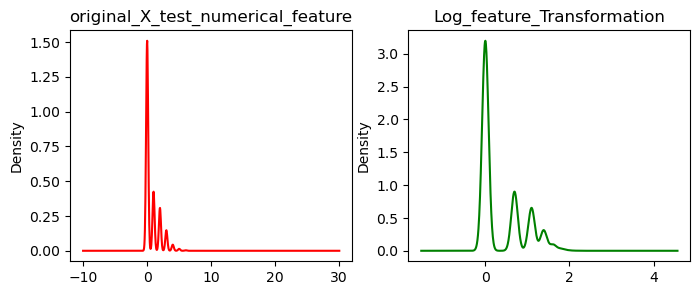

In [68]:
for i in numerical_X_test.columns:
  numerical_X_test[i+'_log'] = np.log(numerical_X_test[i] + 1)
  box_cox(numerical_X_test,i,i+'_log')


In [69]:
numerical_X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome',
       'DebtRatio', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents',
       'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'MonthlyIncome_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log',
       'NumberRealEstateLoansOrLines_log', 'NumberOfDependents_log'],
      dtype='object')

In [70]:
numerical_X_test = numerical_X_test.drop(['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome',
       'DebtRatio', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'],axis=1)

numerical_X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'MonthlyIncome_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log',
       'NumberRealEstateLoansOrLines_log', 'NumberOfDependents_log'],
      dtype='object')

In [71]:
# 5th and 95th


def fith(numerical_X_test,var):
  upper = numerical_X_test[var].quantile(0.95)
  lower = numerical_X_test[var].quantile(0.05)
  return upper , lower

for i in numerical_X_test.columns:
  upper,lower = fith(numerical_X_test,i)
  numerical_X_test[i+'_5th'] = np.where(numerical_X_test[i] > upper , upper ,
                                  np.where(numerical_X_test[i] < lower , lower , numerical_X_test[i]))


In [72]:
numerical_X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'MonthlyIncome_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log',
       'NumberRealEstateLoansOrLines_log', 'NumberOfDependents_log',
       'RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'MonthlyIncome_log_5th', 'DebtRatio_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'NumberOfDependents_log_5th'],
      dtype='object')

In [73]:
# checking outliers for originalX_train_num features and converted [log] outliers
import warnings
warnings.filterwarnings('ignore')

def boxplot_(numerical_X_test,original,log_original):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.title('original_X_test_numerical_feature')
  sns.boxplot(x = numerical_X_test[original])
  plt.subplot(1,2,2)
  plt.title('5th_feature_Transformation')
  sns.boxplot(x = numerical_X_test[log_original])
  plt.show()

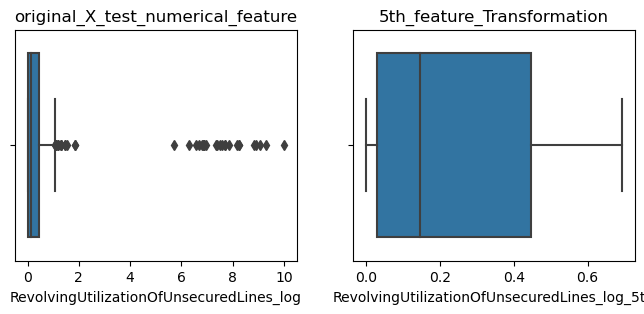

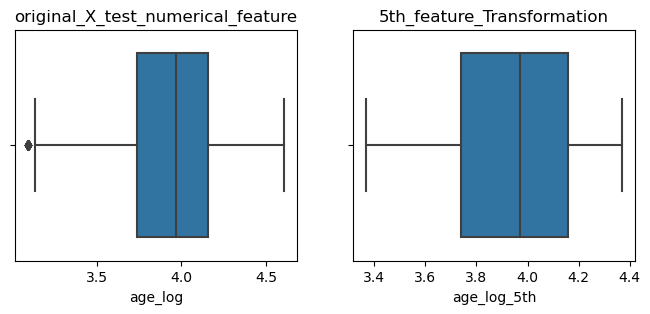

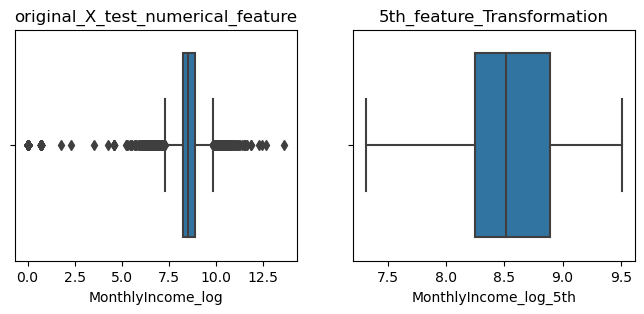

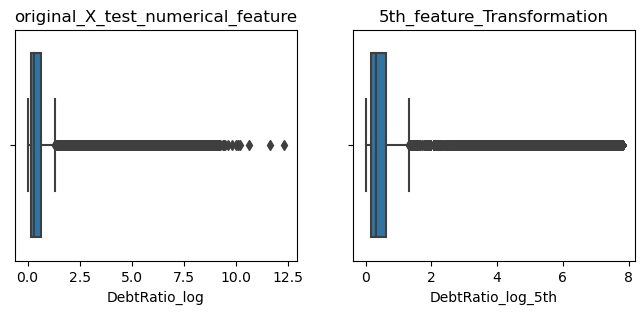

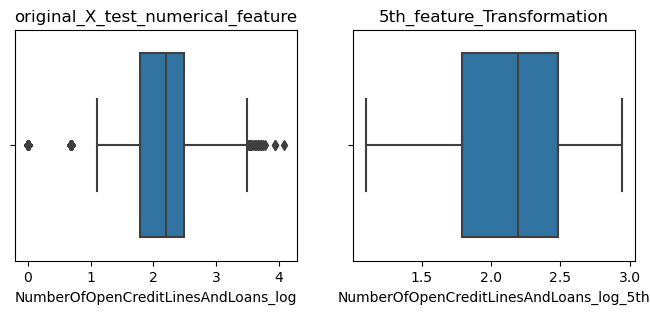

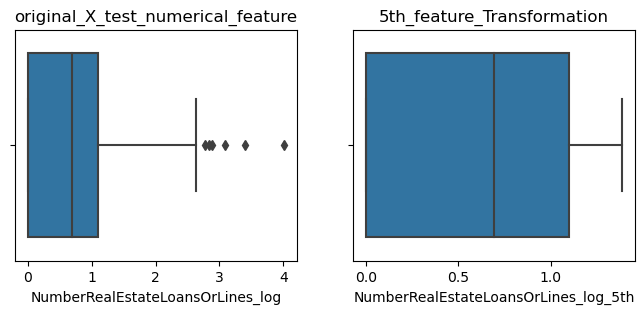

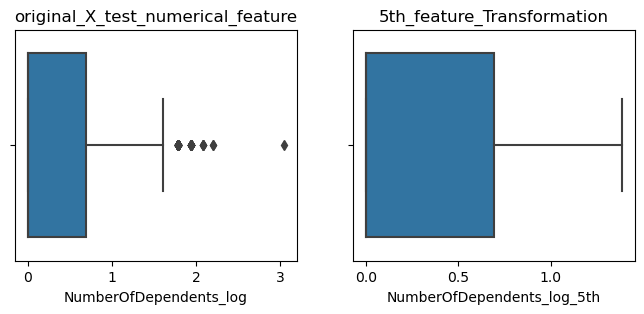

In [74]:
c = []
d = []
for i in numerical_X_test.columns:
  if i.endswith('_log'):
    c.append(i)
  else:
    d.append(i)

for j in range(len(c)):
  boxplot_(numerical_X_test,c[j],d[j])

In [75]:
numerical_X_test = numerical_X_test.drop(['RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'MonthlyIncome_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log',
       'NumberRealEstateLoansOrLines_log', 'NumberOfDependents_log'],axis=1)
numerical_X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'MonthlyIncome_log_5th', 'DebtRatio_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'NumberOfDependents_log_5th'],
      dtype='object')

In [76]:
numerical_X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'DebtRatio_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'MonthlyIncome_mode_log_5th',
       'NumberOfDependents_median_log_5th'],
      dtype='object')

In [77]:
len(numerical_X_train.columns),len(numerical_X_test.columns)

(7, 7)

- `Since in the Training data and Test Data we have cleared null values | varibale transformation and maintained Normal Distribution | and also handled Outliers ... -> finally in both X_train[numeircal columns] and X_test[numerical columns] issues are solved`

`Now we are going to work with X_train[categorical Data to Numerical data] -> Even in the X_test -> [categorical data to Numerical data ]`

In [78]:
categorical_X_train = X_train.select_dtypes(include = 'object')
categorical_X_train.head(5)

,Gender,Region,Rented_OwnHouse,Occupation,Education
135986,Male,West,Rented,Self_Emp,Professional
48361,Female,East,Rented,Officer1,Post-Grad
146561,Male,South,Ownhouse,Self_Emp,Professional
57742,Male,East,Ownhouse,Officer3,Professional
43651,Male,North,Ownhouse,Self_Emp,Post-Grad


In [79]:
# since Gender and Region Features are Nominal Encoding -> we will use OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(categorical_X_train[['Gender']])

b = one_hot.transform(categorical_X_train[['Gender']]).toarray()

one_hot.categories_

categorical_X_train['gender_male'] = b[: , 1].astype(int)

In [80]:
categorical_X_train.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,gender_male
135986,Male,West,Rented,Self_Emp,Professional,1
48361,Female,East,Rented,Officer1,Post-Grad,0
146561,Male,South,Ownhouse,Self_Emp,Professional,1
57742,Male,East,Ownhouse,Officer3,Professional,1
43651,Male,North,Ownhouse,Self_Emp,Post-Grad,1


In [81]:
categorical_X_train['Region'].unique()

array(['West', 'East', 'South', 'North', 'Central'], dtype=object)

In [82]:
# since Gender and Region Features are Nominal Encoding -> we will use OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

one_hot_r = OneHotEncoder(handle_unknown='ignore')
one_hot_r.fit(categorical_X_train[['Region']])

b = one_hot_r.transform(categorical_X_train[['Region']]).toarray()

one_hot_r.categories_[0][0]

categorical_X_train[one_hot_r.categories_[0][0]] = b[: , 0].astype(int)
categorical_X_train[one_hot_r.categories_[0][1]] = b[: , 1].astype(int)
categorical_X_train[one_hot_r.categories_[0][2]] = b[: , 2].astype(int)
categorical_X_train[one_hot_r.categories_[0][3]] = b[: , 3].astype(int)

categorical_X_train.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,gender_male,Central,East,North,South
135986,Male,West,Rented,Self_Emp,Professional,1,0,0,0,0
48361,Female,East,Rented,Officer1,Post-Grad,0,0,1,0,0
146561,Male,South,Ownhouse,Self_Emp,Professional,1,0,0,0,1
57742,Male,East,Ownhouse,Officer3,Professional,1,0,1,0,0
43651,Male,North,Ownhouse,Self_Emp,Post-Grad,1,0,0,1,0


In [83]:
# apply odinal encoding to rented house occupation and education

from sklearn.preprocessing import OrdinalEncoder
od_r = OrdinalEncoder()

od_r.fit(categorical_X_train[['Rented_OwnHouse']])

categorical_X_train['Rented'] = od_r.transform(categorical_X_train[['Rented_OwnHouse']]).astype(int)

In [84]:
categorical_X_train.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,gender_male,Central,East,North,South,Rented
135986,Male,West,Rented,Self_Emp,Professional,1,0,0,0,0,1
48361,Female,East,Rented,Officer1,Post-Grad,0,0,1,0,0,1
146561,Male,South,Ownhouse,Self_Emp,Professional,1,0,0,0,1,0
57742,Male,East,Ownhouse,Officer3,Professional,1,0,1,0,0,0
43651,Male,North,Ownhouse,Self_Emp,Post-Grad,1,0,0,1,0,0


In [85]:
# apply odinal encoding to rented house occupation and education

from sklearn.preprocessing import OrdinalEncoder
od_o = OrdinalEncoder()

od_o.fit(categorical_X_train[['Occupation']])


categorical_X_train['Occupation_re'] = od_o.transform(categorical_X_train[['Occupation']]).astype(int)

In [86]:
# apply odinal encoding to rented house occupation and education

from sklearn.preprocessing import OrdinalEncoder
od_e = OrdinalEncoder()

od_e.fit(categorical_X_train[['Education']])


categorical_X_train['Education_re'] = od_e.transform(categorical_X_train[['Education']]).astype(int)

In [87]:
categorical_X_train.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
135986,Male,West,Rented,Self_Emp,Professional,1,0,0,0,0,1,4,4
48361,Female,East,Rented,Officer1,Post-Grad,0,0,1,0,0,1,1,3
146561,Male,South,Ownhouse,Self_Emp,Professional,1,0,0,0,1,0,4,4
57742,Male,East,Ownhouse,Officer3,Professional,1,0,1,0,0,0,3,4
43651,Male,North,Ownhouse,Self_Emp,Post-Grad,1,0,0,1,0,0,4,3


In [88]:
categorical_X_train = categorical_X_train.drop(['Gender','Region','Rented_OwnHouse','Occupation','Education'],axis=1)
categorical_X_train.head()

,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
135986,1,0,0,0,0,1,4,4
48361,0,0,1,0,0,1,1,3
146561,1,0,0,0,1,0,4,4
57742,1,0,1,0,0,0,3,4
43651,1,0,0,1,0,0,4,3


`Same Techniques -> we are going to implement in X_test categorical data ...`

In [89]:
numerical_X_test.head()

,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,MonthlyIncome_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,NumberOfDependents_log_5th
59770,0.693147,3.433987,8.517393,3.806662,1.098612,0.000000,0.000000
21362,0.000000,4.060443,8.955577,0.133273,2.302585,0.693147,0.000000
127324,0.035916,3.891820,8.699681,0.212118,1.945910,1.098612,1.386294
140509,0.693147,3.737670,8.508959,0.151121,1.609438,0.000000,0.000000
144297,0.693147,3.912023,8.517393,7.800614,2.397895,0.693147,0.000000


In [90]:
categorical_X_test = X_test.select_dtypes(include = 'object')
categorical_X_test.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
59770,Male,Central,Rented,Self_Emp,Professional
21362,Female,North,Rented,Officer3,Post-Grad
127324,Female,East,Rented,Officer1,Post-Grad
140509,Male,West,Rented,Non-officer,Professional
144297,Male,West,Rented,Officer2,Professional


In [91]:
# already we have implemented in training data -> same we are going to implement in test data

b = one_hot.transform(categorical_X_test[['Gender']]).toarray()
categorical_X_test['gender_male'] = b[: , 1].astype(int)


b1 = one_hot_r.transform(categorical_X_test[['Region']]).toarray()

categorical_X_test[one_hot_r.categories_[0][0]] = b1[: , 0].astype(int)
categorical_X_test[one_hot_r.categories_[0][1]] = b1[: , 1].astype(int)
categorical_X_test[one_hot_r.categories_[0][2]] = b1[: , 2].astype(int)
categorical_X_test[one_hot_r.categories_[0][3]] = b1[: , 3].astype(int)


categorical_X_test['Rented'] = od_r.transform(categorical_X_test[['Rented_OwnHouse']]).astype(int)

categorical_X_test['Occupation_re'] = od_o.transform(categorical_X_test[['Occupation']]).astype(int)

categorical_X_test['Education_re'] = od_e.transform(categorical_X_test[['Education']]).astype(int)

In [92]:
categorical_X_test.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
59770,Male,Central,Rented,Self_Emp,Professional,1,1,0,0,0,1,4,4
21362,Female,North,Rented,Officer3,Post-Grad,0,0,0,1,0,1,3,3
127324,Female,East,Rented,Officer1,Post-Grad,0,0,1,0,0,1,1,3
140509,Male,West,Rented,Non-officer,Professional,1,0,0,0,0,1,0,4
144297,Male,West,Rented,Officer2,Professional,1,0,0,0,0,1,2,4


In [93]:
categorical_X_test = categorical_X_test.drop(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'],axis=1)

In [94]:
categorical_X_test.columns

Index(['gender_male', 'Central', 'East', 'North', 'South', 'Rented',
       'Occupation_re', 'Education_re'],
      dtype='object')

`making all training data into 1 part and test data into 1 part `

In [95]:
X_train_perfect = pd.concat([numerical_X_train,categorical_X_train],axis=1)
X_train_perfect.sample(5)

,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,MonthlyIncome_mode_log_5th,NumberOfDependents_median_log_5th,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
141408,0.035269,4.143135,7.481556,1.945910,0.693147,8.517393,0.000000,1,0,0,0,0,1,2,4
54416,0.693147,3.526361,0.004310,1.386294,0.000000,8.648397,0.000000,1,0,1,0,0,0,4,4
19119,0.136963,3.737670,0.352748,2.079442,1.098612,8.740497,1.386294,0,0,0,1,0,0,1,3
74417,0.002872,3.496508,4.276666,1.098612,0.000000,8.517393,0.000000,0,1,0,0,0,0,4,4
37853,0.693147,3.401197,3.988984,1.098612,0.000000,8.517393,0.000000,1,0,0,0,0,0,2,1


In [96]:
X_test_perfect = pd.concat([numerical_X_test,categorical_X_test],axis=1)
X_test_perfect.sample(5)

,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,MonthlyIncome_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,NumberOfDependents_log_5th,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
83231,0.144187,3.401197,8.688454,0.241379,2.708050,1.098612,0.000000,1,1,0,0,0,1,4,4
10641,0.179744,4.143135,9.322776,0.027153,2.397895,0.000000,0.000000,0,0,0,0,1,0,1,3
83343,0.693147,3.610918,8.517393,5.480639,1.791759,0.000000,0.000000,1,1,0,0,0,0,0,4
48592,0.321530,4.290459,9.443038,0.359855,2.708050,1.386294,1.386294,0,0,1,0,0,1,3,3
33707,0.079630,4.077537,8.517393,4.510860,2.079442,0.000000,0.000000,1,0,0,1,0,0,4,2


In [97]:
print(X_test_perfect.shape)

(15000, 15)


**Feature_selection**

In [98]:
# constant technique and quasi constant

from sklearn.feature_selection import VarianceThreshold
reg = VarianceThreshold(threshold=0) # defaulty variance 0


reg.fit(X_train_perfect)

VarianceThreshold(threshold=0)

In [99]:
sum(reg.get_support())   # 267 feturess are not constant

15

In [100]:
constant = X_train_perfect.columns[~reg.get_support()]

len(constant)

0

In [101]:
constant

Index([], dtype='object')

In [102]:
X_train_perfect.shape

(135000, 15)

In [103]:
X_train_perfect.head()

,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,MonthlyIncome_mode_log_5th,NumberOfDependents_median_log_5th,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
135986,0.459287,3.688879,4.852030,1.386294,0.000000,8.517393,0.000000,1,0,0,0,0,1,4,4
48361,0.411962,4.189655,0.250661,1.791759,0.000000,8.026497,0.000000,0,0,1,0,0,1,1,3
146561,0.134501,4.025352,0.394841,2.833213,1.386294,9.510519,0.693147,1,0,0,0,1,0,4,4
57742,0.539652,3.784190,0.126901,2.484907,0.000000,8.679822,0.693147,1,0,1,0,0,0,3,4
43651,0.000000,3.912023,6.770789,2.944439,1.098612,8.517393,1.386294,1,0,0,1,0,0,4,3


In [104]:
y_train.head()

135986    Good
48361     Good
146561    Good
57742     Good
43651     Good
Name: Good_Bad, dtype: object

In [105]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(y_train)

LabelEncoder()

In [106]:
y_train_n = lb.transform(y_train)
y_train_n[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
y_test_n = lb.transform(y_test)
y_test_n[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
# i want to apply pearson correlation along withh hypothesis testing [p_value]

from scipy.stats import pearsonr

c1 = []


for i in X_train_perfect.columns:
  sol = pearsonr(X_train_perfect[i] , y_train_n)
  c1.append(sol)

c1

[PearsonRResult(statistic=-0.2718187297649243, pvalue=0.0),
 PearsonRResult(statistic=0.11673221306675637, pvalue=0.0),
 PearsonRResult(statistic=0.017599298115302635, pvalue=1.0007618759847953e-10),
 PearsonRResult(statistic=0.04665782986766401, pvalue=6.034728465223953e-66),
 PearsonRResult(statistic=0.0367110232952597, pvalue=1.7215862146783026e-41),
 PearsonRResult(statistic=0.057325108289509964, pvalue=1.2207997220572713e-98),
 PearsonRResult(statistic=-0.046231123716877015, pvalue=8.893002400944992e-65),
 PearsonRResult(statistic=-0.004202445433259148, pvalue=0.12257148030528062),
 PearsonRResult(statistic=0.15810536305661665, pvalue=0.0),
 PearsonRResult(statistic=0.05087034565130341, pvalue=4.688909537549488e-78),
 PearsonRResult(statistic=-0.023094377775713264, pvalue=2.1300972967337116e-17),
 PearsonRResult(statistic=0.00025373860985075723, pvalue=0.9257219088609981),
 PearsonRResult(statistic=-0.004403871948792514, pvalue=0.10564562999761334),
 PearsonRResult(statistic=-0.00

In [109]:
c1 = np.array(c1)
c1

array([[-2.71818730e-01,  0.00000000e+00],
       [ 1.16732213e-01,  0.00000000e+00],
       [ 1.75992981e-02,  1.00076188e-10],
       [ 4.66578299e-02,  6.03472847e-66],
       [ 3.67110233e-02,  1.72158621e-41],
       [ 5.73251083e-02,  1.22079972e-98],
       [-4.62311237e-02,  8.89300240e-65],
       [-4.20244543e-03,  1.22571480e-01],
       [ 1.58105363e-01,  0.00000000e+00],
       [ 5.08703457e-02,  4.68890954e-78],
       [-2.30943778e-02,  2.13009730e-17],
       [ 2.53738610e-04,  9.25721909e-01],
       [-4.40387195e-03,  1.05645630e-01],
       [-1.02077928e-03,  7.07619652e-01],
       [ 3.41408808e-02,  4.09213500e-36]])

In [110]:
f1 = pd.Series(c1[: , 1],index = X_train_perfect.columns)
f1

RevolvingUtilizationOfUnsecuredLines_log_5th    0.000000e+00
age_log_5th                                     0.000000e+00
DebtRatio_log_5th                               1.000762e-10
NumberOfOpenCreditLinesAndLoans_log_5th         6.034728e-66
NumberRealEstateLoansOrLines_log_5th            1.721586e-41
MonthlyIncome_mode_log_5th                      1.220800e-98
NumberOfDependents_median_log_5th               8.893002e-65
gender_male                                     1.225715e-01
Central                                         0.000000e+00
East                                            4.688910e-78
North                                           2.130097e-17
South                                           9.257219e-01
Rented                                          1.056456e-01
Occupation_re                                   7.076197e-01
Education_re                                    4.092135e-36
dtype: float64

<Axes: >

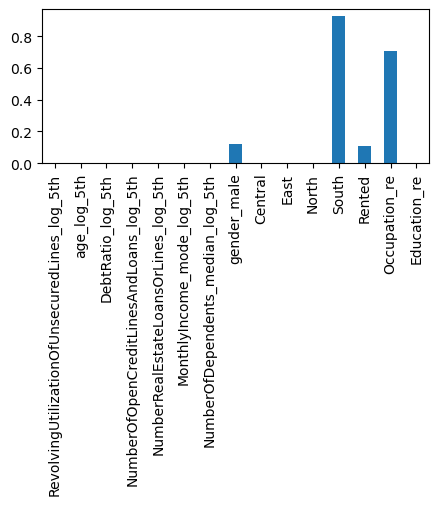

In [111]:
plt.figure(figsize = (5,2))
f1.plot.bar()

In [112]:
# in the training data please check the data is balanced or not

y_train.value_counts()

Good_Bad
Good    125935
Bad       9065
Name: count, dtype: int64

In [113]:
!pip install imblearn 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [114]:
X_test_perfect 

,RevolvingUtilizationOfUnsecuredLines_log_5th,age_log_5th,MonthlyIncome_log_5th,DebtRatio_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,NumberOfDependents_log_5th,gender_male,Central,East,North,South,Rented,Occupation_re,Education_re
59770,0.693147,3.433987,8.517393,3.806662,1.098612,0.000000,0.000000,1,1,0,0,0,1,4,4
21362,0.000000,4.060443,8.955577,0.133273,2.302585,0.693147,0.000000,0,0,0,1,0,1,3,3
127324,0.035916,3.891820,8.699681,0.212118,1.945910,1.098612,1.386294,0,0,1,0,0,1,1,3
140509,0.693147,3.737670,8.508959,0.151121,1.609438,0.000000,0.000000,1,0,0,0,0,1,0,4
144297,0.693147,3.912023,8.517393,7.800614,2.397895,0.693147,0.000000,1,0,0,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90394,0.693147,3.433987,7.719130,0.080214,1.386294,0.000000,0.000000,1,1,0,0,0,0,0,0
53959,0.476462,3.367296,8.696343,0.102414,1.945910,0.000000,0.000000,1,0,1,0,0,1,3,4
124099,0.693147,3.663562,8.141190,0.632040,1.945910,1.098612,0.693147,0,0,1,0,0,1,1,3
7060,0.078138,4.077537,7.939515,0.920700,2.833213,1.098612,0.000000,1,0,0,0,1,0,4,1


### feature scaling 

In [115]:
# Before going to train the algo we need to scale down the values 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # formula -> xi - mean / std()

sc.fit(X_train_perfect)

X_train_perfect_s = sc.transform(X_train_perfect)

In [116]:
X_train_perfect_s

array([[ 0.87145962, -0.90676414,  1.30405093, ...,  1.15902682,
         0.9865122 ,  1.04213106],
       [ 0.67886124,  0.91826341, -0.48726605, ...,  1.15902682,
        -0.77042227,  0.43171669],
       [-0.45033969,  0.31947668, -0.43113664, ..., -0.8627928 ,
         0.9865122 ,  1.04213106],
       ...,
       [-0.72698112, -0.09353885, -0.38443014, ...,  1.15902682,
        -0.77042227,  1.04213106],
       [-0.18968435, -1.19088751, -0.5751155 , ...,  1.15902682,
         0.9865122 ,  1.04213106],
       [-0.22850734,  0.74872567, -0.54591191, ...,  1.15902682,
         0.9865122 ,  0.43171669]])

In [118]:
X_test_perfect_s = X_test_perfect[['RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th','DebtRatio_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th','NumberRealEstateLoansOrLines_log_5th', 'MonthlyIncome_log_5th','NumberOfDependents_log_5th', 'gender_male', 'Central', 'East','North', 'South', 'Rented', 'Occupation_re', 'Education_re']]

In [119]:
X_test_perfect_s = X_test_perfect_s.rename(columns={'MonthlyIncome_log_5th':'MonthlyIncome_mode_log_5th' , 'NumberOfDependents_log_5th':'NumberOfDependents_median_log_5th'})

In [120]:
X_test_perfect_s = sc.transform(X_test_perfect_s)

In [121]:
# since the train data is scale down we can give the data to the algorithm 
# KNN , Naive bayes , Logistic Regression , Decision Tree , Random Forest 

def KNN(X_train,y_train,X_test,y_test):
    reg_knn = KNeighborsClassifier(n_neighbors=5)
    reg_knn.fit(X_train,y_train)
    print(f'Train Accuracy : {reg_knn.score(X_train,y_train)}')
    print(f'Test Accuracy : {reg_knn.score(X_test,y_test)}')
    print(f'confusion Matrix : {confusion_matrix(y_test,reg_knn.predict(X_test))}')
    print(f'Classification Report : {classification_report(y_test,reg_knn.predict(X_test))}')

In [122]:
def NB(X_train,y_train,X_test,y_test):
    reg_NB = GaussianNB()
    reg_NB.fit(X_train,y_train)
    print(f'Train Accuracy : {reg_NB.score(X_train,y_train)}')
    print(f'Test Accuracy : {reg_NB.score(X_test,y_test)}')
    print(f'confusion Matrix : {confusion_matrix(y_test,reg_NB.predict(X_test))}')
    print(f'Classification Report : {classification_report(y_test,reg_NB.predict(X_test))}')

In [123]:
def LR(X_train,y_train,X_test,y_test):
    reg_lr = LogisticRegression()
    reg_lr.fit(X_train,y_train)
    print(f'Train Accuracy : {reg_lr.score(X_train,y_train)}')
    print(f'Test Accuracy : {reg_lr.score(X_test,y_test)}')
    print(f'confusion Matrix : {confusion_matrix(y_test,reg_lr.predict(X_test))}')
    print(f'Classification Report : {classification_report(y_test,reg_lr.predict(X_test))}')

In [124]:
def DT(X_train,y_train,X_test,y_test):
    reg_dt = DecisionTreeClassifier(criterion='entropy')
    reg_dt.fit(X_train,y_train)
    print(f'Train Accuracy : {reg_dt.score(X_train,y_train)}')
    print(f'Test Accuracy : {reg_dt.score(X_test,y_test)}')
    print(f'confusion Matrix : {confusion_matrix(y_test,reg_dt.predict(X_test))}')
    print(f'Classification Report : {classification_report(y_test,reg_dt.predict(X_test))}')

In [125]:
def RF(X_train,y_train,X_test,y_test):
    reg_rf = RandomForestClassifier(n_estimators=5)
    reg_rf.fit(X_train,y_train)
    print(f'Train Accuracy : {reg_rf.score(X_train,y_train)}')
    print(f'Test Accuracy : {reg_rf.score(X_test,y_test)}')
    print(f'confusion Matrix : {confusion_matrix(y_test,reg_rf.predict(X_test))}')
    print(f'Classification Report : {classification_report(y_test,reg_rf.predict(X_test))}')

In [126]:
def calling(X_train,y_train,X_test,y_test):
    print('----knn---')
    KNN(X_train,y_train,X_test,y_test)
    print('---Naive bayes------')
    NB(X_train,y_train,X_test,y_test)
    print('---Logistic Regresssion----')
    LR(X_train,y_train,X_test,y_test)
    print('-----Decision Tree-------')
    DT(X_train,y_train,X_test,y_test)
    print('----Random Forest--------')
    RF(X_train,y_train,X_test,y_test)

In [127]:
calling(X_train_perfect_s,y_train_n,X_test_perfect_s,y_test_n)

----knn---
Train Accuracy : 0.9511703703703703
Test Accuracy : 0.944
confusion Matrix : [[  254   707]
 [  133 13906]]
Classification Report :               precision    recall  f1-score   support

           0       0.66      0.26      0.38       961
           1       0.95      0.99      0.97     14039

    accuracy                           0.94     15000
   macro avg       0.80      0.63      0.67     15000
weighted avg       0.93      0.94      0.93     15000

---Naive bayes------
Train Accuracy : 0.8837703703703703
Test Accuracy : 0.8881333333333333
confusion Matrix : [[  467   494]
 [ 1184 12855]]
Classification Report :               precision    recall  f1-score   support

           0       0.28      0.49      0.36       961
           1       0.96      0.92      0.94     14039

    accuracy                           0.89     15000
   macro avg       0.62      0.70      0.65     15000
weighted avg       0.92      0.89      0.90     15000

---Logistic Regresssion----
Train Acc

In [128]:
# insted of accuracy we will check AUC and ROC and will decide the Model 

from sklearn.metrics import roc_curve,auc,roc_auc_score

In [129]:
reg_knn = KNeighborsClassifier()
reg_NB = GaussianNB()
reg_LR = LogisticRegression()
reg_DT = DecisionTreeClassifier(criterion='entropy')
reg_RF = RandomForestClassifier(n_estimators=5)


reg_knn.fit(X_train_perfect_s,y_train_n)
reg_NB.fit(X_train_perfect_s,y_train_n)
reg_LR.fit(X_train_perfect_s,y_train_n)
reg_DT.fit(X_train_perfect_s,y_train_n)
reg_RF.fit(X_train_perfect_s,y_train_n)


y_pred_knn = reg_knn.predict(X_test_perfect_s)
y_pred_nb = reg_NB.predict(X_test_perfect_s)
y_pred_lr = reg_LR.predict(X_test_perfect_s)
y_pred_dt = reg_DT.predict(X_test_perfect_s)
y_pred_rf = reg_RF.predict(X_test_perfect_s)

In [131]:
# implement Auc and ROC

fprk,tprk,threk = roc_curve(y_test_n,y_pred_knn)
fprn,tprn,thren = roc_curve(y_test_n,y_pred_nb)
fprl,tprl,threl = roc_curve(y_test_n,y_pred_lr)
fprd,tprd,thred = roc_curve(y_test_n,y_pred_dt)
fprr,tprr,threr = roc_curve(y_test_n,y_pred_rf)

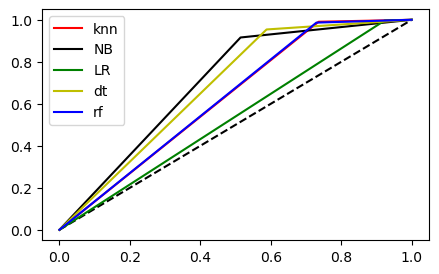

In [139]:
plt.figure(figsize=(5,3))
plt.plot([0, 1], [0, 1], "k--")

plt.plot(fprk,tprk,color='r',label='knn')
plt.plot(fprn,tprn,color='black',label='NB')
plt.plot(fprl,tprl,color='g',label='LR')
plt.plot(fprd,tprd,color='y',label='dt')
plt.plot(fprr,tprr,color='blue',label='rf')

plt.legend(loc=0)
plt.show()

In [140]:
# since Finalizeed Model was Naive Bayes 

In [141]:
# save the Model 

import pickle 

In [142]:
with open('credit_final_model.pkl','wb') as f:
    pickle.dump(reg_NB,f)